#**Método de Numerov**
Sirve para resolver problemas de valor inicial para ODEs de segundo orden con la forma particular de:
$$
			    \dfrac{d^2y}{dx^2}=f(x)y + g(x)
$$
es decir, con ausencia de la primera derivada y el lado derecho linealmente dependiente de la solución, se puede resolver de manera más eficiente utilizando el método de varios pasos desarrollado por el astrónomo B. Numerov (1923).\\
El método de Numerov es popular debido a su alta precisión $O(h^6)$, simplicidad algorítmica y aplicabilidad directa para resolver la ecuación de Schrödinger.

Comenzamos con las siguientes aproximaciones en serie de Taylor
$$
y_{m+1}=y_m+hy'_m+\dfrac{h^2}{2!}y''_m + \dfrac{h^3}{3!}y^{(3)}_m + \dfrac{h^4}{4!}y^{(4)}_m + \dfrac{h^5}{5!}y^{(5)}_m + O(h^6)
$$

$$
y_{m-1}=y_m - hy'_m+\dfrac{h^2}{2!}y''_m - \dfrac{h^3}{3!}y^{(3)}_m + \dfrac{h^4}{4!}y^{(4)}_m - \dfrac{h^5}{5!}y^{(5)}_m + O(h^6)
$$

Se puede notar que las derivadas de orden impar se eliminan al sumar las expansiones anteriores,
$$
y_{m+1} + y_{m-1}=2y_m +h^2y''_m +  \dfrac{1}{12}h^4y^{(4)}_m  + O(h^6)
$$

Buscando una relación algebraica para la solución propagada $y_{m + 1}$ en términos de valores anteriores, es necesario reemplazar las derivadas restantes, $y''_m$ y $y^{(4)}_m$, con un esquema de diferencias finitas, pero conservando la precisión general $O(h^6)$.\\
La segunda derivada $y''_m$ se puede expresar fácilmente a partir de la propia ecuación diferencial:
$$
y''_m=f_my_m + g_m
$$

donde $f_m\equiv f(x_m)$ y $g_m\equiv g(x_m)$.

$y^{(4)}_m$ puede ser calculada a partir de $y''$ a partir de la ecuación diferencial,

$$
y^{(4)}_m=[f(x)y + g(x)]''_m
$$

Para segundas derivadas, en general, uno debe idear un esquema de diferencias finitas manteniendo la aproximación $O(h^4)$:

$$
h^2 y''_m=y_{m+1} - 2y_m + y_{m-1} + O(h^4)
$$
		
Aplicada en particular a $y^{(4)}_m=\left[f(x)y + g(x)\right]^{''}_m$, $y^{(4)}_m$ queda

		
$$
h^4y^{(4)}_m = h^2\left(f_{m+1}y_{m+1} -2f_my_m + f_{m-1}y_{m-1}\right)
$$

$$
+ h^2\left(g_{m+1} + 10g_m + g_{m-1}\right) + O(h^6)
$$
		
Insertando $h^4y^{(4)}_m$ y $y''_m$ en

$$y_{m+1} + y_{m-1}=2y_m +h^2y''_m +  \dfrac{1}{12}h^4y^{(4)}_m  + O(h^6)$$


La fórmula de Numerov es:
$$
y_{m+1}=[(2+\dfrac{5}{6}h^2f_m)y_m - (1-\dfrac{1}{12}h^2f_{m-1})y_{m-1}
$$

$$
+\dfrac{1}{12}h^2(g_{m+1} + 10g_m + g_{m-1})](1-\dfrac{1}{12}h^2f_{m+1})^{-1} + O(h^6)
$$

Finalmente, si hacemos $\boxed{u_m = 1-\dfrac{1}{12}h^2f_m}$, la fórmula de Numerov puede expresarse bajo una forma más conveniente:
	   
$$
\boxed{y_{m+1}=\dfrac{(12-10u_m)y_m - u_{m-1}y_{m-1}}{u_{m+1}} + \dfrac{1}{12}h^2\dfrac{g_{m+1} + 10g_m + g_{m-1}}{u_{m+1}} + O(h^6)}
$$

La desventaja del método Numerov es que no se inicia automáticamente, lo que está intrínsecamente vinculado a su naturaleza de múltiples pasos. En consecuencia, se deben proporcionar dos valores de solución iniciales antes de que se pueda iniciar la recurrencia. Esto se puede lograr mediante un paso inicial realizado con un algoritmo de inicio automático (Euler, Runge-Kutta, etc.)


##**Ecuación de Schrödinger independiente del tiempo**

Considere la ecuación de Schrödinger independiente del tiempo 1D para una partícula de masa $m$ en un potencial $V(x)$
			
$$
-\dfrac{\hbar^2}{2m}\dfrac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x)
$$
			
La ecuación puede ser simplificada a
$$
\psi'' = 2[V(x) - E]\psi
$$

Si $u_m = 1-\dfrac{1}{12}h^2f_m$, la fórmula de Numerov puede expresarse bajo la forma más conveniente:
	   
$$
y_{m+1}=\dfrac{(12-10u_m)y_m - u_{m-1}y_{m-1}}{u_{m+1}} + \dfrac{1}{12}h^2\dfrac{g_{m+1} + 10g_m + g_{m-1}}{u_{m+1}} + O(h^6)
$$

Por lo tanto, las relaciones que definen su solución por el método de Numerov toman la siguiente forma:
			
$$
u_m = 1-\dfrac{1}{6}h^2[V(x_m) - E],
$$

$$
\psi_{m+1} = \dfrac{(12 - 10u_m)\psi_m - u_{m-1}\psi_{m-1}}{u_{m+1}}
$$

Supongamos un potencial de la forma $V(x)=1/x^2$

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
N = 1000
axl = lambda x, e : -2*e + x**2

In [79]:
def wavefunc(E, N):
    a = -6.0 
    b = 6.0
    h = (b-a)/N
    x = np.ones(N)
    Psi = np.zeros(N)
    f = np.zeros(N)
    
    Psi[0] = 0.0
    Psi[1] = 1e-3

    x[0] = a
    x[1] = a + h
    f[0] = axl(x[0],E)
    f[1] = axl(x[1],E)
    
    for i in range(2,N):
        x[i] = x[i-1] + h
        f[i] = axl(x[i], E)
        
        num = (12 - 10 * (1 - (h**2/12) * f[i-1])) * Psi[i-1] -  (1 - (h**2/12) * f[i-2]) * Psi[i-2]
        denom = 1 - (h**2 / 12) * f[i]
        
        Psi[i] = num/denom
    
    return x,Psi

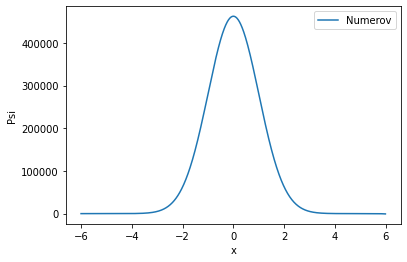

In [80]:
x,y = wavefunc(0.5, N)
plt.plot(x, y, label='Numerov')

plt.legend(loc='upper right')
plt.xlabel('x') 
plt.ylabel('Psi')

plt.show()

¿Qué pasaría si $E=6.5$?

Text(0, 0.5, 'Psi')

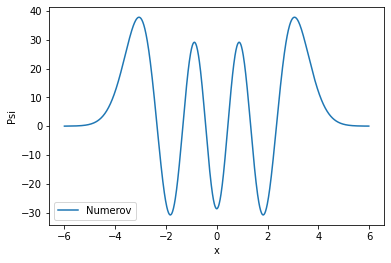

In [81]:
x,y = wavefunc(6.5,N)
plt.plot(x,y, label='Numerov')
plt.legend(loc='best')
plt.xlabel('x') 
plt.ylabel('Psi')

Por último, imagine que no conoce ninguna energía válida para el sistema que está simulando. Así que implementamos una rutina que itera sobre un rango de valores y los probamos para evaluar si un valor es correcto o no. ¿Cómo sabemos que el valor que asumimos es una energía válida?

Text(0, 0.5, 'Psi')

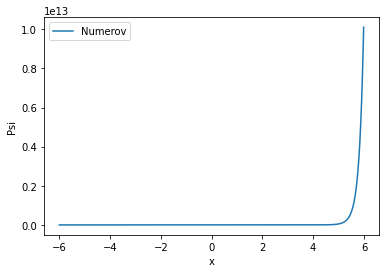

In [57]:
x,y = wavefunc(0.2,N)
plt.plot(x,y,label='Numerov')
plt.legend(loc='best')
plt.xlabel('x') 
plt.ylabel('Psi')

En caso de que la energía no sea válida, la función de onda no se comporta como se esperaba, es decir, no es cero en el lado derecho. Así que vamos a definir una función *fast_wavefunc* porque no necesitamos almacenar una lista de N elementos para comparar el último valor de la función de onda.

In [58]:
def epsilon(E, dE, N):
    P1 = fast_wavefunc(E,N)
    E = E + dE
    while abs(dE) > 1e-12:
        P2 = fast_wavefunc(E,N)
        if P1*P2 < 0:
            dE = -dE/2.0
        E = E + dE
        P1 = P2
    return E
    
    
def fast_wavefunc(E,N):
    a = -6.0 
    b = 6.0
    h = (b-a)/N
    x = np.ones(3)
    Psi = np.zeros(3)
    f = np.zeros(3)
    Psi[0] = 0.0
    Psi[1] = 1e-3
    x[0] = a
    x[1] = a + h
    f[0] = axl(x[0],E)
    f[1] = axl(x[1],E)
    
    for i in range(N-2):
        x[2] = x[1] + h
        f[2] = axl(x[2],E)

        num = (12 - 10 * (1 - (h**2/12) * f[1])) * Psi[1] -  (1 - (h**2/12) * f[0]) * Psi[0]
        denom = 1 - (h**2 / 12) * f[2]

        Psi[2] = num/denom

        Psi[0] = Psi[1]
        Psi[1] = Psi[2]
        f[0] = f[1]
        f[1] = f[2]
        x[0] = x[1]
        x[1] = x[2]
    return Psi[2]

Si $V(x)=0$

In [42]:
axl = lambda x,e : -2*e + 0.0

¿Cuáles son las diez primeras energías válidas?

In [43]:
ene = np.zeros(10)
for i in range(10):
    ene = epsilon(i,0.01,1000)
    print("{0} \t {1}".format(i,ene))


0 	 0.034338101589237315
1 	 1.2361716566252297
2 	 2.19763849816692
3 	 3.433810145119778
4 	 4.154910267732919
5 	 5.8031391013535725
6 	 6.730267806486793
7 	 7.726072698596965
8 	 8.79055377254086
9 	 9.923711022036713


Graficando algunos resultados

Text(0, 0.5, 'Psi')

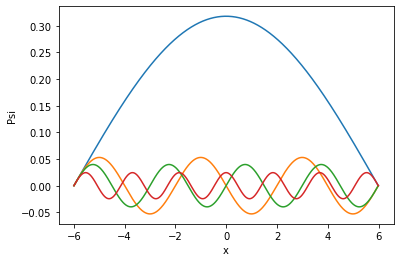

In [44]:
x,y = wavefunc(0.034338101589237315,N)
x,y1 = wavefunc(1.2361716566252297,N)
x,y2 = wavefunc(2.19763849816692,N)
x,y3 = wavefunc(5.8031391013535725,N)
plt.plot(x,y, x, y1, x, y2, x, y3)
plt.xlabel('x') 
plt.ylabel('Psi')

Text(0, 0.5, 'Psi')

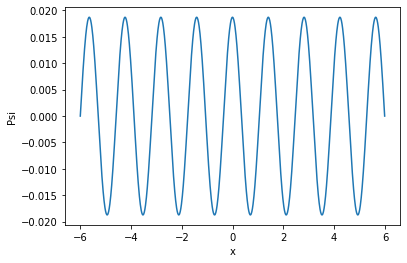

In [46]:
x,y9 = wavefunc(9.923711022036713,N)
plt.plot(x,y9)
plt.xlabel('x') 
plt.ylabel('Psi')

#**Método de disparo (Shooting Method)**
Los métodos de disparo se desarrollan con el objetivo de transformar un problema con ecuaciones diferenciales de segundo orden con valores en la frontera, en un problema de valor inicial que sea equivalente.

El nombre del método de disparo se deriva de la analogía con el tiro al blanco: disparamos al objetivo y observamos dónde golpea el objetivo, en función de los errores, podemos ajustar nuestra puntería y disparar de nuevo con la esperanza de que golpeará cerca del objetivo. Este método es un método iterativo.

Veamos cómo funcionan los métodos de disparo usando la EDO de segundo orden dada por

$$\dfrac{d^2y}{dx^2} = f(x, y, y')$$

y con las siguientes condiciones de frontera $f(a) = f_a$ y $f(b) = f_b$

**Paso 1**: comenzamos todo el proceso estimando $f'(a) = \alpha$, junto con $f(a) = f_a$, convertimos el problema anterior en un problema de valor inicial con dos condiciones, todas en el valor $x=a$. Este es el paso del objetivo.

**Paso 2**: Usando lo que aprendimos en las clases previas, es decir, podemos usar el método de Runge-Kutta, para integrar al otro límite $b$, y de esta manera  para encontrar $f(b) = f_{\beta}$. Este es el paso de disparo.

**Paso 3**: ahora comparamos el valor de $f_{\beta}$ con $f_b$, generalmente nuestra suposición inicial no es buena, y $f_{\beta}≠f_b$, pero lo que queremos es $f_{\beta} - f_b = 0$, por lo tanto, ajustamos nuestras suposiciones iniciales y repetimos. Hasta que el error sea aceptable, podemos parar. Este es el paso iterativo.

Aunque las ideas detrás de los métodos de disparo son muy simples, comparar y encontrar las mejores conjeturas no es fácil, lo cual vuelve este procedimiento muy tedioso. Encontrar la mejor suposición para obtener $f_{\beta} - f_b = 0$ es un problema de búsqueda de raíces, una vez que nos damos cuenta de esto, tenemos una forma sistemática de buscar la mejor suposición. 

##**Caida libre**
Vamos a lanzar una piedra. Conocemos el valor de la gravedad $g = 9.8 m/s^2$. Si queremos tener la piedra justo al nivel del suelo pasados 10 segundos del lanzamiento, ¿cuál debe ser la velocidad en el lanzamiento? (ignoramos la resitencia del aire).

Para responder a esta pregunta, podemos enmarcar el problema en un problema de valores en la frontera para una EDO de segundo orden:

$$\dfrac{d^2y}{dt^2} = -g$$

con las siguientes dos condiciones de contorno: $y(0) = 0$ y $y(10) = 0$. Y queremos responder a la pregunta, ¿cuál es el $y'(0)$ en el lanzamiento?

Analíticamente, la respuesta correcta es $y'(0) = 49$ m/s. Ahora vamos a resolverlo usando el método de disparo. Primero, reduciremos el orden de la función, la EDO de segundo orden se convierte en:

$$\dfrac{dy}{dt} = v$$
$$\dfrac{dv}{dt} = -g$$

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import optimize

Comencemos con nuestra primera suposición, suponemos que la velocidad en el lanzamiento es de 60 m/s.

In [66]:
g = 9.8
y0 = 0
tf = 10

def f(t, r):
  y, v = r
  dy_dt = v
  dv_dt = -g
  return dy_dt, dv_dt

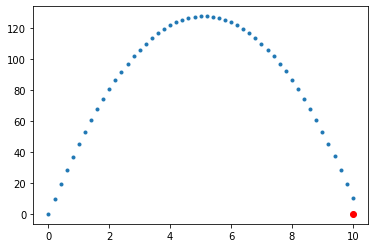

In [83]:
v0 = 50 #guess

t = np.linspace(0, tf, 51)
sol = solve_ivp(f, (0, tf), (y0, v0), t_eval=t)
y, v = sol.y
plt.plot(t,y,'.')

plt.plot(10, 0, 'ro')
plt.show()

Vemos que esta suposición no es confiable, ya que con esta velocidad de $60$ $m/s$, la piedra aún se encuentra por encima del punto de partida. El punto rojo en la figura es el objetivo que queremos alcanzar.

**¿Qué sucede si variamos $v_0$ = 55 m/s, 50 m/s, 49 m/s?**

Podemos ver que para el caso de $60$ $m/s$ sobreestimamos la velocidad. Por lo tanto, con esta suposición aleatoria no es fácil encontrar el mejor resultado. Sin embargo; si tratamos este procedimiento como una búsqueda de raíces, entonces tendremos una buena manera de buscar el mejor resultado. Usemos fsolve de Python para encontrar la raíz. Podemos ver en el siguiente ejemplo, que encontramos la respuesta correcta directamente.

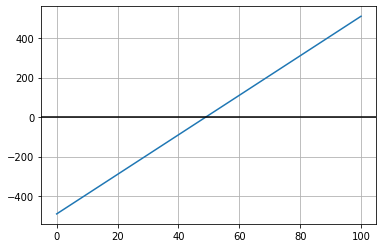

In [74]:
@np.vectorize #Permite crear una función vectorizada a partir de una que no lo es, lo que nos permite aplicar esta última a un array.
def yf(v0):
  sol = solve_ivp(f, (0, tf), (y0, v0))
  y, v = sol.y
  return y[-1] #toma el último elemento

v0 = np.linspace(0, 100, 100)
plt.plot(v0, yf(v0))
plt.grid()
plt.axhline(c='k')
plt.show()

In [73]:
#Usar método de Newton, o de la secante  para encontrar las raíces

v0 = optimize.newton(yf, 50)
print(v0)

48.99999999999995


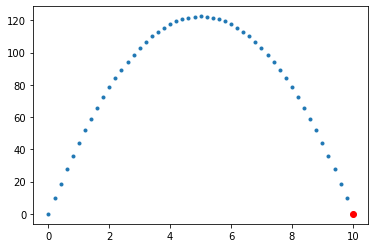

In [70]:
#Usar v0 para dibujar la solución actual

t = np.linspace(0, tf, 51)
sol = solve_ivp(f, (0, tf), (y0, v0), t_eval=t)
y, v = sol.y
plt.plot(t,y,'.')
plt.plot(10, 0, 'ro')
plt.show()

##**Ejemplo 2:** Determinar numéricamente las energías de un oscilador armónico cuántico en una dimensión. En otras palabras, estamos buscando los valores propios de la ecuación de Schrödinger independiente del tiempo.

$$-\dfrac{\hbar}{2m}\dfrac{d^2}{dt^2}\psi = (E-V)\psi$$

con $V=\dfrac{1}{2}m\omega^2x^2$

Nos centraremos principalmente en las tres energías más bajas. Primero, escribimos la ecuación de Schrödinger de la siguiente forma

$$\psi'' = -\dfrac{2m}{\hbar}(E-\dfrac{1}{2}m\omega^2x^2)\psi$$

y por simplicidad, hacemos $m = ω = ℏ = 1$, lo que produce la ecuación

$$\psi'' = (x^2 - 2E)\psi$$

Ahora calcularemos las energías propias de este problema utilizando el método de disparo, sabiendo que la función de onda debe tender a cero cuando $x→∞$. Primero, dividimos el intervalo que nos interesa, $[a,b]$, en n intervalos iguales con longitud

$$\Delta x = \dfrac{b-a}{n}$$

siendo $x_i = a + i\Delta x$. Aproximaremos $\psi''(x)$ en el punto $x_i$ mediante el método de diferencias central, el cual nos da

$$\psi''_i=\dfrac{\psi_{i+1}+\psi_{i-1}-2\psi_i}{(\Delta x)^2}$$

donde $\psi_i$, $\psi_i'$ y $\psi_i''$ es el valor de la función $\psi(x)$, $\psi(x)'$ y $\psi(x)''$ en el punto $x=x_i$, respectivamente.

Usando la ecuación de Schrödinger,

$$\psi'' = (x^2 - 2E)\psi$$

obtenemos

$$\dfrac{\psi_{i+1}+\psi_{i-1}-2\psi_i}{(\Delta x)^2} = (x^2 - 2E)\psi_i$$

Al usar esta fórmula, podemos calcular iterativamente todos los valores de la función siempre que tengamos dos valores iniciales para comenzar. En este problema, consideramos un potencial que es simétrico con respecto a $x=0$. Por lo tanto, los valores iniciales $ψ_0$ y $ψ′_0$ estarán dados en $x=0$ y aproximamos el siguiente valor de la función $ψ_1$ simplemente por

$$\psi_1=\psi_0 + \psi_0' \Delta x$$

Para un potencial simétrico, el estado fundamental, el segundo estado excitado, el cuarto estado excitado... son simétricos, mientras que el primer estado excitado, el tercer estado excitado... son antisimétricos. Dado que el potencial del oscilador armónico es simétrico con respecto a $x=0$, nos permite usar el método en una sola dirección, centrándonos en $x>0$ y comenzando con los valores iniciales en x=0, es decir, $ψ_0$ y $ψ′_0$.

#**Para el estado fundamental**

Dado que el estado fundamental debe ser simétrico con respecto a $x=0$, tenemos que tener $ψ′_0 = 0$. También tenemos que elegir un valor para $ψ_0$, como por ejemplo $ψ_0=1$. La elección particular del valor de $ψ_0$ no afectará el valor propio de la energía porque su valor real estará determinado por la normalización de la función de onda. Usando estos dos valores iniciales, ahora podemos calcular la energía del estado fundamental de la siguiente manera. 

* Primero, elegimos un límite superior e inferior para la energía estimada del estado fundamental. Aquí es donde surge la incertidumbre ya que no sabemos a priori dónde se encuentran las energías propias. 
* Posteriormente, seguimos avanzando hasta $x_i=b$, comenzando en $x_0=0$, con una energía propia estimada $E_0$ que se determina iterativamente mediante el método de bisección: si el valor de la función de onda crece hasta el infinito a medida que $x→∞$, necesitamos elevar el valor de $E_0$; si el valor de la función de onda tiende a infinito negativo, necesitamos bajar $E_0$. Truncamos el método de bisección cuando se logra la precisión deseada y trazamos la solución analítica frente a la solución numérica de la función de onda. 

La energía E0 es: 0.500332214879553


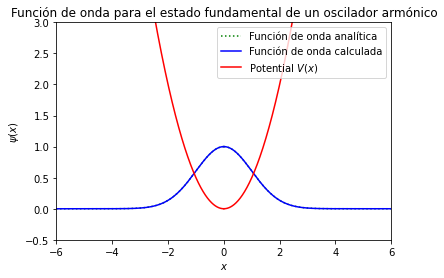

In [77]:
n = 1000.0    
p = 10    
dx = 1.0/n        # longitud del paso

f0= np.zeros(10000) # array para los valores de la función f0
f0[0] = 1.0       # valor inicial para f0 en x = 0
df0_0 = 0.0       # valor inicial para df0/dx en x = 0

x = np.linspace(0,10,10000,True)

tol = 1e-15       # tolerancia
e1 = 0.0          # Límite inferior, debe ser positivo ya que el potencial es positivo para todo x
e2 = 4.0          # Límite superior
E0 = e1
deltaE0 = 1

while deltaE0 > tol:
    for i, x_ in enumerate(x[0:-1]):
        if i == 0:
            f0[i+1] = f0[i] + dx*df0_0
        else:
            f0[i+1] = - f0[i-1] + f0[i]*(2 - (dx**2)*(2*E0 - x_**2))
        
        # Implementación del método de bisección. Si el valor de la función está fuera de los límites,
        # se elige un nuevo valor para la energía. Cuando la diferencia entre el límite superior
        # y el límite inferior para la energía es menor que la tolerancia dada,
        # el ciclo while se detiene, dando un resultado para E1.

        if f0[i] > 5:
            e1 = E0
            E0 = e1 + (e2-e1)/2
            break
        elif f0[i] < -5:
            e2 = E0
            E0 = e2 - (e2-e1)/2
            break
    deltaE0 = e2-e1
print(r'La energía E0 es: %s'% E0)

#Plot:
p1, = plt.plot(x, np.exp(-x**2/2), 'g:')       # analytical eigenfunction
p2, = plt.plot(x, f0, 'b')                     # Funcion propia calculada
p3, = plt.plot(x, 0.5*x**2, 'r')               # Potential
plt.plot(-x, np.exp(-x**2/2), 'g:', -x, f0, 'b', -x,0.5*x**2, 'r') # para valores negativos de x
plt.legend([p1, p2, p3],['Función de onda analítica', 'Función de onda calculada', r'Potential $V(x)$'])
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(x)$')
plt.ylim([-0.5, 3])
plt.xlim([-6, 6])
plt.title('Función de onda para el estado fundamental de un oscilador armónico');

De la solución analítica de un oscilador armónico, sabemos que las energías propias están dadas por

$$E_n = ℏω(n+\dfrac{1}{2})$$.
Si $ℏ=ω=1$, tenemos que $E_n=(n+\dfrac{1}{2})$, el cual concuerda con el resultado obtenido. 

##**Primer estado excitado**
Para el primer estado excitado, tenemos que elegir diferentes valores iniciales. Dado que esta es una función antisimétrica, debemos tener $ψ_0=0$, mientras que $ψ′_0$ se puede elegir libremente esta vez, $ψ′_0=1$.  Nuevamente, esto es solo una cuestión de normalización. Como estamos buscando el primer estado excitado, sabemos que $E_1>E_0$, lo que significa que podemos elegir $E_0$ como nuestro límite inferior. Elegir un límite superior apropiado puede ser la parte complicada, ya que debe ser más bajo que la energía propia del segundo estado excitado. En cualquier caso, la concordancia entre la solución numérica y la analítica vuelve a ser impresionante.

La energía E1 es: 1.5001498587221596


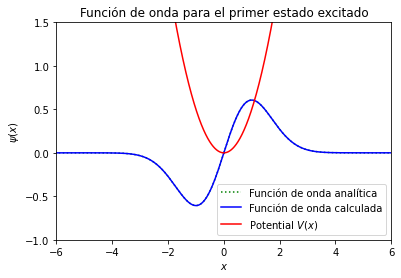

In [26]:
f1 = np.zeros(10000)
f1[0] = 0.0
df1_0 = 1.0

e1 = E0
e2 = 2.0
E1 = e1
deltaE1 = 1
while deltaE1 > tol:
    for i, x_ in enumerate(x[0:-1]):
        if i == 0:
            f1[i+1] = f1[i]+dx*df1_0
        else:
            f1[i+1] = -f1[i-1]+f1[i]*(2-dx**2*(2*E1-x_**2))
        if f1[i] > 5:
            e1 = E1
            E1 = e1 + (e2-e1)/2
            break
        elif f1[i] < -5:
            e2 = E1
            E1 = e2 - (e2-e1)/2
            break
    deltaE1 = e2-e1

print(r'La energía E1 es: %s' % E1)

p1, = plt.plot(x, x*np.exp(-x**2/2), 'g:')
p2, = plt.plot(x, f1, 'b')
p3, = plt.plot(x, 0.5*x**2, 'r')
plt.plot(-x, -x*np.exp(-x**2/2), 'g:', -x, -f1, 'b', -x, 0.5*x**2, 'r') 
plt.legend([p1, p2, p3],['Función de onda analítica', 'Función de onda calculada', r'Potential $V(x)$'])
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(x)$')
plt.ylim([-1,1.5])
plt.xlim([-6,6])
plt.title('Función de onda para el primer estado excitado');

Y si usamos from scipy import optimize...

##**Segundo estado excitado**
Para el segundo estado excitado, sabemos que $E_2>E_1$ y que la función de onda es simétrica. Por lo tanto, podemos usar las mismas condiciones iniciales que para el estado fundamental. Una vez más, la elección de un límite superior apropiado es fundamental.

La enería E2 es: 2.5009550642267624


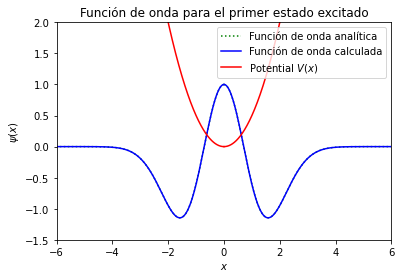

In [29]:
f2 = np.zeros(10000)
f2[0] = 1.0
df2_0 = 0.0

e1 = E1
e2 = 3.0
E2 = e1
deltaE2 = 1
while deltaE2 > tol:
    for i, x_ in enumerate(x[0:-1]):
        if i == 0:
            f2[i+1] = f2[i]+dx*df2_0
        else:
            f2[i+1] = -f2[i-1]+f2[i]*(2-dx**2*(2*E2-x_**2))
        if f2[i] < -5:
            e1 = E2
            E2 = e1 + (e2-e1)/2
            break
        elif f2[i] > 5:
            e2 = E2
            E2 = e2 - (e2-e1)/2
            break
    deltaE2 = e2-e1
    
# ¡Observe que las dos últimas condiciones aquí son diferentes de las dos anteriores!
# La razón es que la función de onda ahora tiene raíces para $x ≠ 0$ y se aproxima al eje x desde abajo.

print(r'La enería E2 es: %s' % E2) 

p1, = plt.plot(x, -(2*x**2-1)*np.exp(-x**2/2), 'g:')
p2, = plt.plot(x, f2, 'b')
p3, = plt.plot(x, 0.5*x**2, 'r')
plt.plot(-x, -(2*x**2-1)*np.exp(-x**2/2), 'g:', -x, f2, 'b', -x,0.5*x**2, 'r')
plt.legend([p1, p2, p3],['Función de onda analítica', 'Función de onda calculada', r'Potential $V(x)$'])
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(x)$')
plt.ylim([-1.5,2])
plt.xlim([-6,6])
plt.title('Función de onda para el primer estado excitado');


#**Método de diferencias finitas**

El método de diferencias finitas convierte ecuaciones diferenciales ordinarias (ODE) o ecuaciones diferenciales parciales (PDE), que pueden ser no lineales, en un sistema de ecuaciones lineales que pueden resolverse mediante técnicas de álgebra matricial.

Consideremos el siguiente problema co condiciones de frontera

$$y'' = p(x)y' + q(x)y + r(x)$$

$$\alpha_1y(x_a) + \beta_1y'(x_a)=1$$
$$\alpha_2y(x_b) + \beta_2y'(x_b)=1$$

donde $p(x)$, $q(x)$ y $r(x)$ son continuas en el intervalo $[x_a,x_b]$. Las condiciones de frontera soncompletamente definidas por los coeficientes $\alpha_1$, $\beta_1$, $\alpha_2$ y $\beta_2$.

En particular, para $\beta_i=0$, resulta una condición de frontera de Dirichlet, que define el valor de la solución en la frontera, mientras que $α_i = 0$ conduce a una condición de frontera de Neumann, que fija la derivada de la solución en la frontera. Los tipos de condición pueden diferir en los dos límites, según el problema modelado.

Consideremos una partición en el dominio $[x_a, x_b]$, caracterizada por los puntos de malla equidistantes:

$$x_m = x_a + (m-1)h, \,\,\,\,\,\, m= 1, 2, ..., M$$

con un tamaño de paso igual a

$$h = \dfrac{x_b - x_a}{M-1}$$

Partiendo de las expansiones de Taylor de la solución en $x_{m+1}=x_m + h$ y $x_{m-1}=x_m - h$ 


$$y_{m+1}=y_m + hy'_m +\dfrac{1}{2!}h^2y_m'' + \dfrac{1}{3!}h^3y_m^{(3)} + O(h^4)$$

$$y_{m-1}=y_m - hy'_m +\dfrac{1}{2!}h^2y_m'' - \dfrac{1}{3!}h^3y_m^{(3)} + O(h^4)$$

Para la primera derivada $y'_m$, se pueden obtener las aproximaciones simplemente ignorando todos los términos mayores que $(h^2/2)y_m'$:

$$y'_m = \dfrac{y_m-y_{m-1}}{h} + O(h),\,\,\,\,\,\,\,\, y'_m = \dfrac{y_{m+1}-y_m}{h} + O(h)$$

La primera es una fórmula de diferencias hacia atrás (backward-difference formula) ya que conecta $x_m$ con el punto anterior, $x_{m−1}$; mientras que el segundo es una fórmula de diferencia hacia adelante (forward-difference formula) ya que conecta $x_m$ con el siguiente punto, $x_{m+1}$.

Una aproximación de orden superior para $y_m$ resulta de la diferencia de las expansiones de Taylor $y_{m+1}$ y $y_{m-1}$ e ignorando los términos de orden superior a (h^3/6)y_m^{(3)}

$$y'_m = \dfrac{y_{m+1} - y_{m-1}}{2h}+O(h^2)$$

Esta fórmula de diferencia central (central-difference formula) emplea información de puntos de malla ubicados simétricamente sobre el punto $x_m$ donde se expresa la derivada. 

Si por el contrario sumamos las expansiones de Taylor $y_{m+1}$ y $y_{m-1}$, tenemos

$$y''_m = \dfrac{y_{m+1} - 2y_m + y_{m-1}}{h^2}+O(h^2)$$

La aplicación de esquemas de diferencia central para problemas lineales discretizados de dos puntos conduce a un sistema  de ecuaciones lineales. Usando las dos últimas ecuaciones para para discretizar la EDO del problema y las fórmulas de $y'_m$ para aproximar las condiciones de contorno, obtenemos el siguiente sistema lineal:


$\dfrac{y_{m+1} - 2y_m + y_{m+1}}{h^2} = p_m\dfrac{y_{m+1} - y_{m-1}}{2h} + q_my_m + r_m,\,\,\,\,\,\,\,\, m = 2, 3,..., M-1$

$\alpha_1y_1 + \beta_1\dfrac{y_2-y_1}{h}=1,$

$\alpha_2y_M + \beta_2\dfrac{y_M-y_{;-1}}{h}=1,$

Reagrupando los valores de la solución desconocida $y_m$, el sistema lineal discretizado correspondiente problema con valores en la frontera entregado inicialmente toma la forma:

$(h\alpha_1 - \beta_1)y_1 + \beta_1y_2 = h$,

$-(2+hp_m)y_{m-1} + (4 + 2h^2q_m)y_m - (2-hp_m)y_{m+1} = -2h^2y_m,\,\,\,\,\,\,\,m = 2, 3,...,M-1$

$-\beta_2 y_{M-1} + (h\alpha_2 + \beta_2)y_M = h$

Este sistema tiene una matriz tridiagonal y se puede representar finalmente como

$$
\begin{equation}
\begin{pmatrix}
b_1 & c_1 &     &  & &  &\\
a_2 & b_2 & c_2 &  & & 0 &\\
 & \ddots & \ddots & \ddots & &  &\\
 &  & a_m & b_m & c_m &  &\\
 &  & \ddots &\ddots & \ddots &  & \\
 & 0 &  &  & a_{M-1} & b_{M-1}  & c_{M-1}\\
  &  &  &  &  & a_M  & b_M\\
\end{pmatrix}
\end{equation}
\begin{pmatrix}
  y_1\\
  y_2\\
  \vdots\\
  y_m\\
  \vdots\\
  y_{M-1}\\
  y_{M}\\
\end{pmatrix}
=
\begin{pmatrix}
  d_1\\
  d_2\\
  \vdots\\
  d_m\\
  \vdots\\
  d_{M-1}\\
  d_{M}\\
\end{pmatrix}
$$

Con las siguientes expresiones

$b_1 = h\alpha_1 - \beta_1, \,\,\, c_1 = \beta_1, \,\,\, d_1=h$

$a_m = -(2+hp_m), \,\,\,\, m = 2, 3,..., M-1,$

$b_m = 4 + 2h^2q_m$

$c_m = -(2-hp_m)$

$d_m=-2h^2r_m$

$a_M=-\beta_2, \,\,\,\, b_M=h\alpha_2+\beta_2,\,\,\,\,\, d_M = h$


La función que se cree, debe recibir como datos de entrada los límites $x_a$ y $x_b$, el número $n_x$ de puntos de malla espacial, así como los cuatro coeficientes que definen las condiciones de contorno, $\alpha_1$, $\beta_1$, $\alpha_2$ y $\beta_2$. Los valores de las funciones $p(x)$, $q(x)$ y $r(x)$ son dados en el problema. 

Resolver la ecuación de Schrödinger del emeplo anterior con método de diferencias finitas.

[1] Richard, L., & Burden, J. (2011). Douglas faires, numerical analysis.


[2] Beu, T. A. (2014). Introduction to numerical programming: a practical guide for scientists and engineers using Python and C/C++. CRC Press.


[3] Pang, T. (1999). An introduction to computational physics.